# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [83]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [84]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

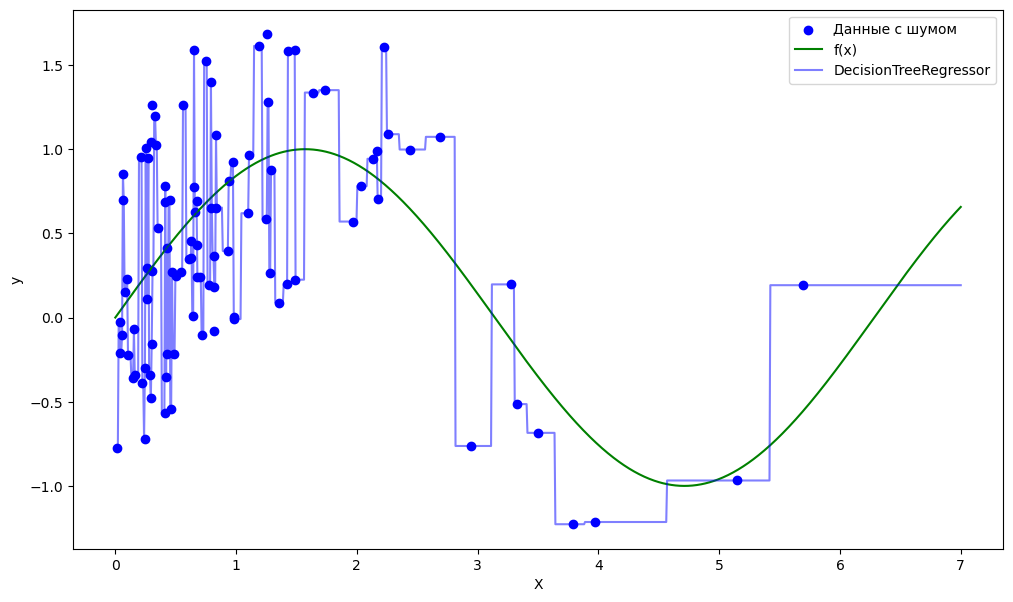

In [85]:
from sklearn.tree import DecisionTreeRegressor

X = np.random.exponential(scale=1, size=sample_size)
noise = np.random.uniform(low=-1, high=1, size=sample_size)
y = f(X) + noise

reg = DecisionTreeRegressor()
reg.fit(X[:, np.newaxis], y)
    
y_pred = reg.predict(linspace[:, np.newaxis])

plt.figure(figsize=(12, 7))
plt.scatter(X, y, label='Данные с шумом', color='blue')
plt.plot(linspace, f(linspace), color='green', label='f(x)')
plt.plot(linspace, y_pred, label='DecisionTreeRegressor', color='blue', alpha=0.5)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

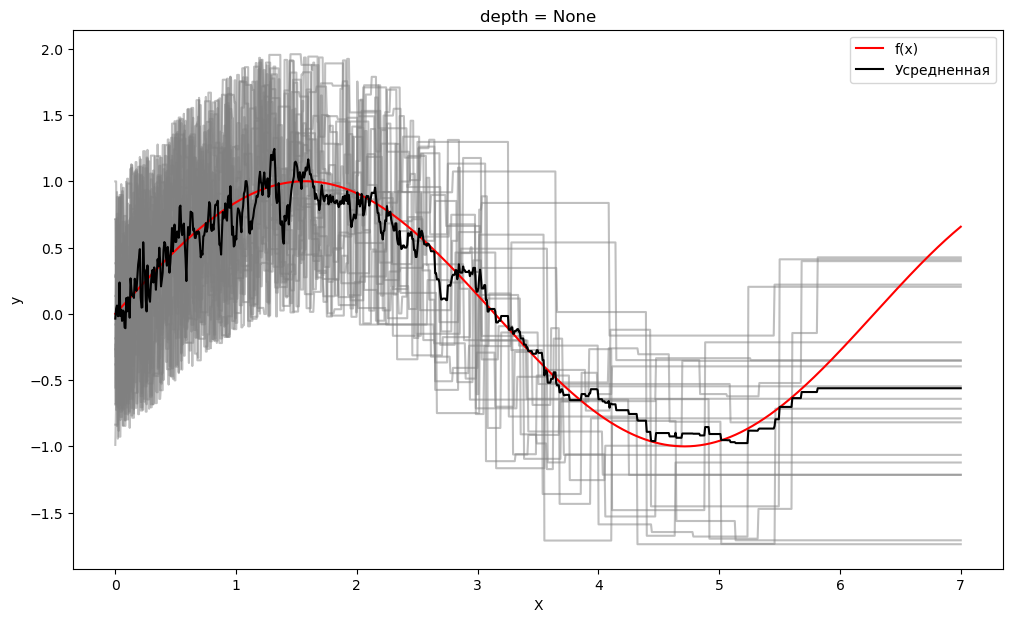

In [86]:
def create_X_y():
    X = np.random.exponential(scale=1, size=sample_size)
    noise = np.random.uniform(low=-1, high=1, size=sample_size)
    y = f(X) + noise
    return X, y
    
def depth(a):
    X, y = create_X_y()
    
    reg = DecisionTreeRegressor(max_depth=a)
    reg.fit(X[:, np.newaxis], y)
    
    y_pred = reg.predict(linspace[:, np.newaxis])
    return y_pred

def draw(a=None):
    y_preds = np.zeros((samples_num, len(linspace)))
    for i in range(samples_num):
        y_preds[i, :] = depth(a)
    
    avg_pred = np.mean(y_preds, axis=0)
    
    plt.figure(figsize=(12, 7))
    for i in range(samples_num):
        plt.plot(linspace, y_preds[i, :], color="gray", alpha=0.5)
    plt.plot(linspace, f(linspace), label='f(x)', color='red')
    plt.plot(linspace, avg_pred, label='Усредненная', color='black')
    plt.legend()
    plt.title(f'depth = {a}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

draw()


__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

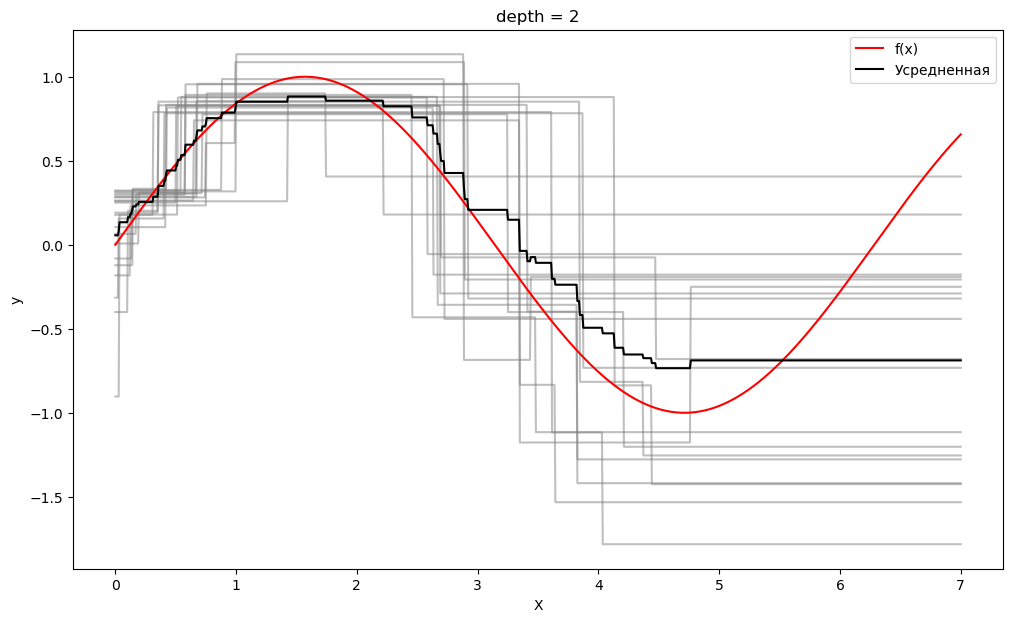

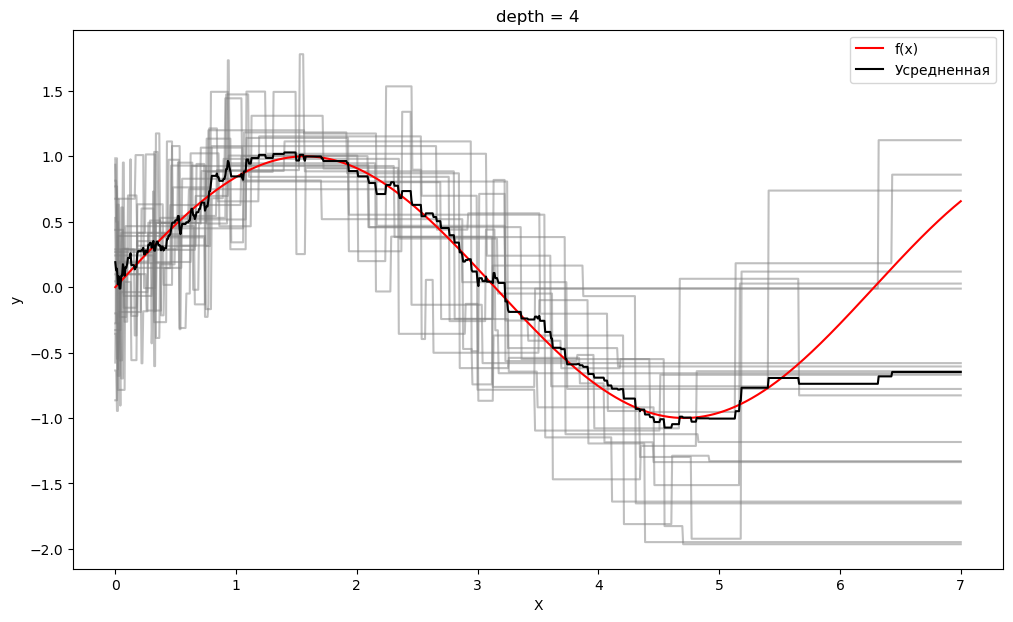

In [87]:
draw(a=2)
draw(a=4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:**
1) Без ограничения глубины смещение довольно близко к нулю
2) При глубине 2 смещение велико
3) При глубине 4 смещение наиболее близко к нулю

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [88]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [89]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from '/Users/lidia/ML/task7_dstree_practice/hw3code.py'>

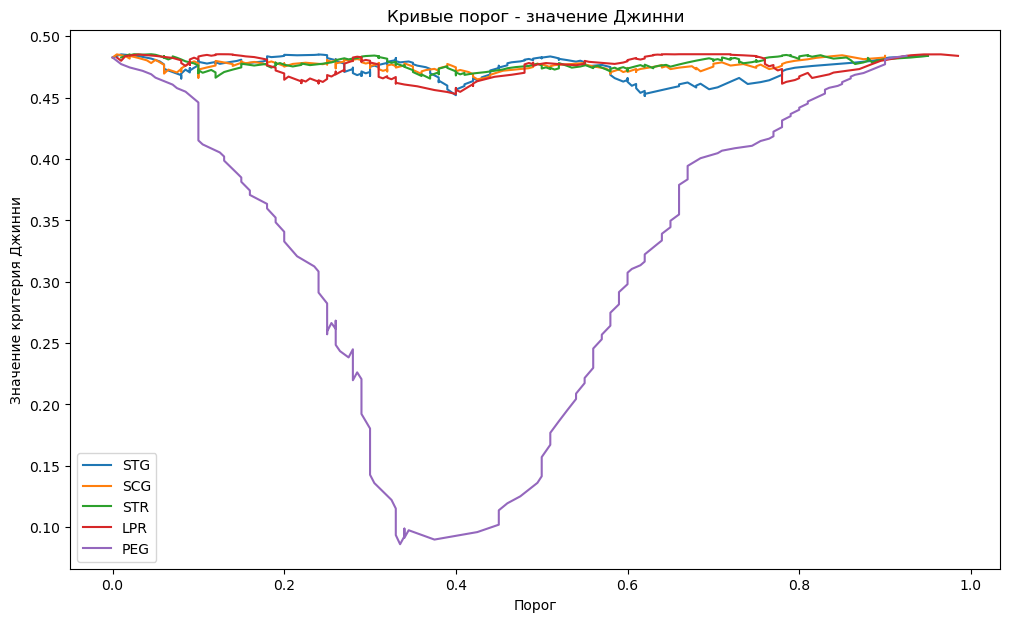

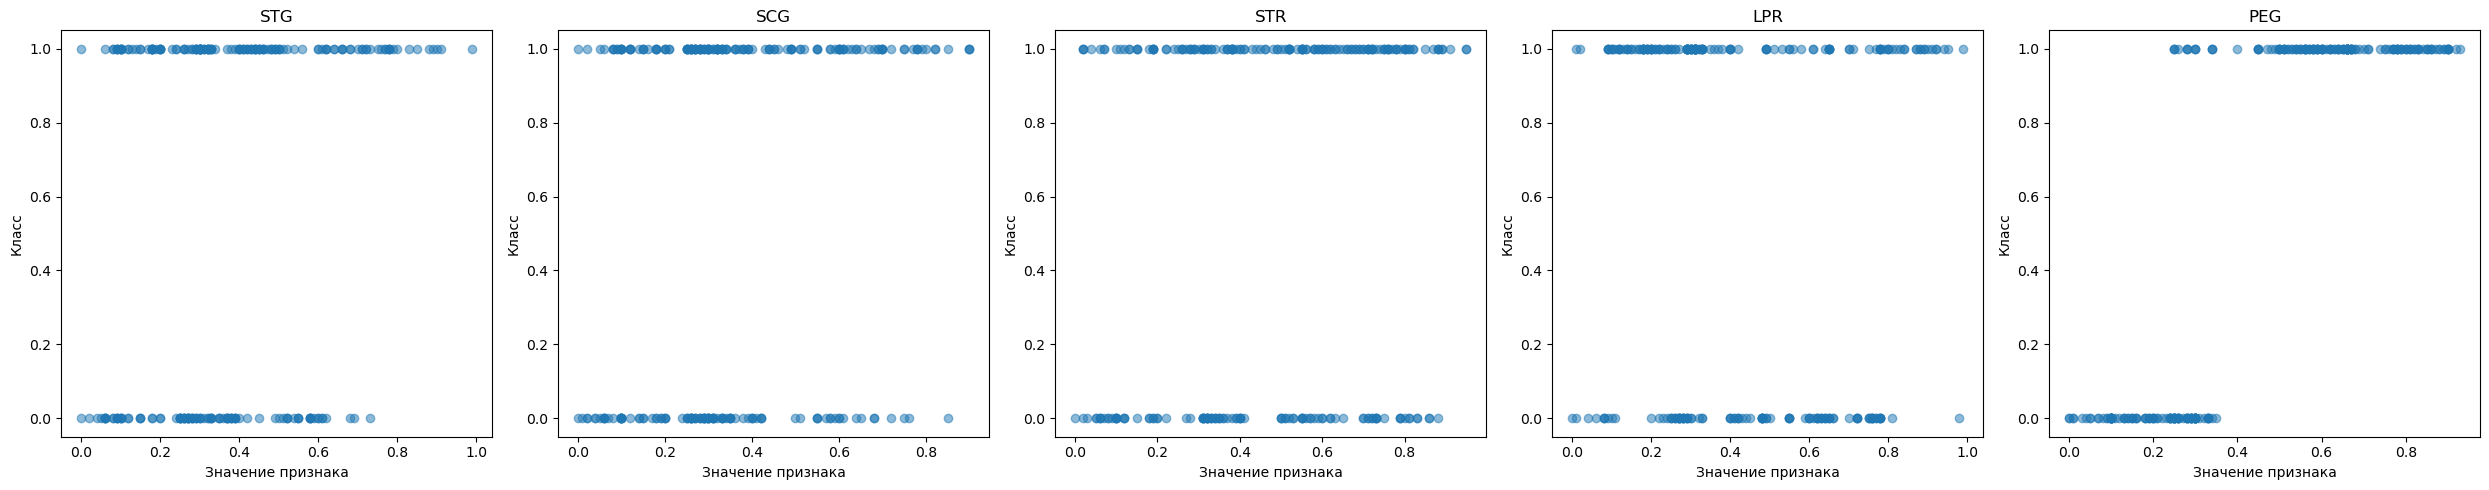

In [90]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

plt.figure(figsize=(12, 7))
plt.title('Кривые порог - значение Джинни')
for feature_name in feature_names:
    thresholds, ginis, threshold, gini = hw3code.find_best_split(x[feature_name], y)
    plt.plot(thresholds, abs(ginis), label=f'{feature_name}')
plt.legend()
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джинни')
plt.show()

n_features = len(feature_names)
fig, axes = plt.subplots(1, n_features, figsize=(5*n_features, 5))
for i, feature_name in enumerate(feature_names):
    axes[i].scatter(x[feature_name], y, alpha=0.5)
    axes[i].set_title(f'{feature_name}')
    axes[i].set_xlabel('Значение признака')
    axes[i].set_ylabel('Класс')

plt.tight_layout()
plt.show()


__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление выборки следует производить по признаку PEG, т.к. кривая значений критерия Джинни по PEG достигает наименьшего значения => разбиение будет наиболее однородным. Этот результат согласуется с визуальной оценкой scatter графиков, потому что только на графике PEG мы видим четкую границу разделения. 
Вид кривой для хорошего признака выглядит так: ярко выражен единствееный глубокий минимум кривой, минимум близок к 0.
Кривые по которым практически невозможно деление:
max значение кривой - min значение кривой <0.03, нет ярковыраженного минимума, минимум функции > 0.4

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [91]:
import pandas as pd
from sklearn.calibration import LabelEncoder

data = pd.read_csv('msh.csv')
LE = LabelEncoder()
for column in data.columns:
    data[column] = LE.fit_transform(data[column])

data.head()


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [92]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred):.10f}')

accuracy: 1.0000000000


### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [93]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv('train.csv', nrows=10000)
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [98]:
numeric = data.select_dtypes(include=[np.number])
numeric.fillna(0, inplace=True)

X = numeric.drop(columns='target')
y = numeric['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_dectree = DecisionTreeClassifier()
clf_bagging = BaggingClassifier(n_jobs=-1, estimator=DecisionTreeClassifier(), n_estimators=100)
clf_randomf = RandomForestClassifier(n_jobs=-1, n_estimators=100)

classifiers = [('Decision Tree', clf_dectree),
               ('Bagging (100 trees)', clf_bagging),
               ('Random Forest (100 trees)', clf_randomf)]

for clf_name, clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    print(f"{clf_name} accuracy: {scores.mean():.10f}")



Decision Tree accuracy: 0.6590011696
Bagging (100 trees) accuracy: 0.7461426427
Random Forest (100 trees) accuracy: 0.7488562756


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
accuracys = []

accuracys = [i for i in range(20, 5001, 20)]

clf_rf = RandomForestClassifier(n_jobs=-1, n_estimators=1, warm_start=True)
for n_estimators in range(20, 5001, 20):
    clf_randomf.set_params(n_estimators=n_estimators)
    clf_randomf.fit(X_train, y_train)
    y_pred = clf_randomf.predict(X_test)
    accuracys.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(12, 7))
plt.title("График зависимости качества от числа деревьев")
plt.plot([i for i in range(20, 5001, 20)], accuracys)
plt.xlabel("Количество деревьев")
plt.ylabel("Accuracy")
plt.grid()
plt.show()